# Advanced_Regression
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.The company is looking at prospective properties to buy to enter the market. 

#### Approach to address this problem
To build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

#### Objective od this asignment 
1. Which variables are significant in predicting the price of a house?
2. How well those variables describe the price of a house?
3. Determine the optimal value of lambda for ridge and lasso regression.

In [1]:
# Import Required libraries
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import statsmodels.api as sm  
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Statistics
from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.max_rows', 500)
# handling warnings
import warnings
warnings.filterwarnings('ignore')


# Step1 : Understanding the data

In [2]:
housing = pd.read_csv('data/train.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Step2 : Handling Missing Values and Null values

In [6]:
# Check if any null values in the dataframe
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# Check the percentage of missing value
total_Missing_Values = housing.isnull().sum().sort_values(ascending = False)
total_values = housing.shape[0]
total_Missing_Percentage = ((housing.isnull().sum()/total_values)*100).sort_values(ascending = False)
Missing_table = pd.concat([total_Missing_Values,total_Missing_Percentage], axis=1, keys= ['Total Missing values','Percentage Missing values'])
print(Missing_table)

               Total Missing values  Percentage Missing values
PoolQC                         1453                  99.520548
MiscFeature                    1406                  96.301370
Alley                          1369                  93.767123
Fence                          1179                  80.753425
FireplaceQu                     690                  47.260274
LotFrontage                     259                  17.739726
GarageYrBlt                      81                   5.547945
GarageCond                       81                   5.547945
GarageType                       81                   5.547945
GarageFinish                     81                   5.547945
GarageQual                       81                   5.547945
BsmtFinType2                     38                   2.602740
BsmtExposure                     38                   2.602740
BsmtQual                         37                   2.534247
BsmtCond                         37                   2

In [8]:
# drop the columns with maximum missing values (>45%)
# From the above information, it can be found that 
housing = housing.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

In [9]:
housing.shape

(1460, 76)

In [10]:
# check again for missing and unique values
# Check the percentage of missing value
total_Missing_Values = housing.isnull().sum().sort_values(ascending = False)
total_values = housing.shape[0]
total_Missing_Percentage = ((housing.isnull().sum()/total_values)*100).sort_values(ascending = False)
Missing_table = pd.concat([total_Missing_Values,total_Missing_Percentage], axis=1, keys= ['Total Missing values','Percentage Missing values'])
print(Missing_table)

               Total Missing values  Percentage Missing values
LotFrontage                     259                  17.739726
GarageType                       81                   5.547945
GarageCond                       81                   5.547945
GarageYrBlt                      81                   5.547945
GarageFinish                     81                   5.547945
GarageQual                       81                   5.547945
BsmtFinType2                     38                   2.602740
BsmtExposure                     38                   2.602740
BsmtFinType1                     37                   2.534247
BsmtCond                         37                   2.534247
BsmtQual                         37                   2.534247
MasVnrArea                        8                   0.547945
MasVnrType                        8                   0.547945
Electrical                        1                   0.068493
PavedDrive                        0                   0

In [11]:
# Needs to treat missing values for the remaining 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
# Identify Categorical and numberical data for missing value treatment
Missing_columns = ['LotFrontage',
'GarageType',  
'GarageCond',  
'GarageYrBlt', 
'GarageFinish',
'GarageQual',  
'BsmtFinType2',
'BsmtExposure',
'BsmtFinType1',
'BsmtCond',    
'BsmtQual',    
'MasVnrArea',  
'MasVnrType',  
'Electrical']  

print(housing[Missing_columns].dtypes)

LotFrontage     float64
GarageType       object
GarageCond       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
BsmtFinType2     object
BsmtExposure     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object


### Data Imputation for Categorical data

In [13]:
# Confirm Categorical or Numerical based on unique values
for column in Missing_columns:
    print(housing[column].nunique())
    

110
6
5
97
3
5
6
4
6
4
4
327
4
5


In [14]:
# if < 6 then consider as categorical data
Categorical_column_Impute = []
for column in Missing_columns:
    if(housing[column].nunique() <= 6):
        housing[column] = housing[column].astype('category') # Convert into categorical column
        mode_value = housing[column].mode()[0] # Find the mode (most frequent value) of the column
        housing[column] = housing[column].fillna(mode_value) # Fill null values with the mode        
        
        Categorical_column_Impute.append(column)        
        print(housing[column].count())    
        
print(Categorical_column_Impute)

1460
1460
1460
1460
1460
1460
1460
1460
1460
1460
1460
['GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']


### Data Imputation for  the Numerical Data

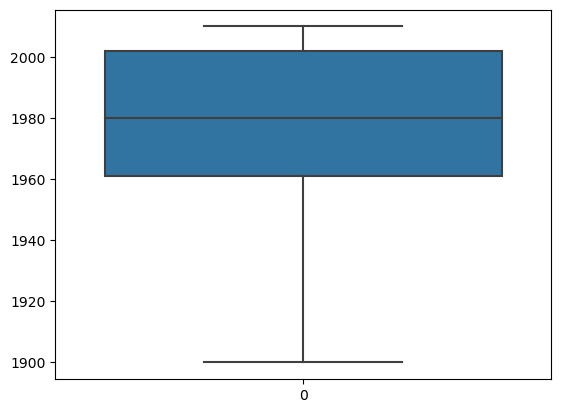

In [15]:
# Nuemeric = [GarageYrBlt','LotFrontage', 'MasVnrArea']

# Analyze GarageYrBlt
sns.boxplot(housing.GarageYrBlt)
plt.show()

In [16]:
# No outlier, filling with mean value
housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].mean(),inplace=True)
print(housing[column].count()) 

1460


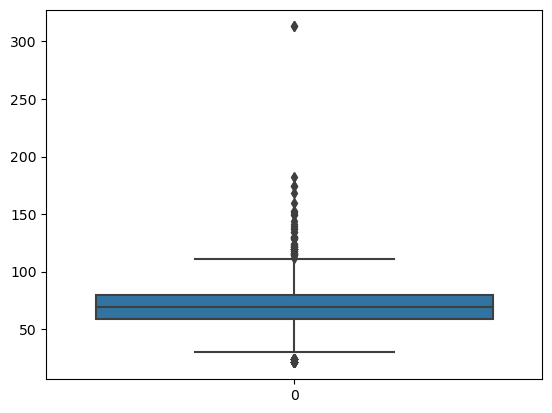

In [17]:
# Analyze LotFrontage
sns.boxplot(housing.LotFrontage)
plt.show()

In [18]:
# As there are outlier, filling with median 
housing['LotFrontage'].fillna(housing['LotFrontage'].median(),inplace=True)
print(housing[column].count()) 

1460


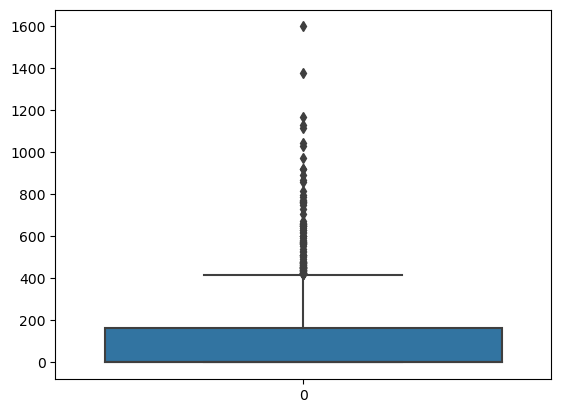

In [19]:
# Analyze MasVnrArea
sns.boxplot(housing.MasVnrArea)
plt.show()

In [20]:
# As there are outliers, imputing with median
housing['MasVnrArea'].fillna(housing['MasVnrArea'].median(),inplace=True)
print(housing[column].count()) 

1460


In [21]:
# Verify Missing Value

total_Missing_Values = housing.isnull().sum().sort_values(ascending = False)
total_values = housing.shape[0]
total_Missing_Percentage = ((housing.isnull().sum()/total_values)*100).sort_values(ascending = False)
Missing_table = pd.concat([total_Missing_Values,total_Missing_Percentage], axis=1, keys= ['Total Missing values','Percentage Missing values'])
print(Missing_table)

               Total Missing values  Percentage Missing values
Id                                0                        0.0
FullBath                          0                        0.0
Fireplaces                        0                        0.0
Functional                        0                        0.0
TotRmsAbvGrd                      0                        0.0
KitchenQual                       0                        0.0
KitchenAbvGr                      0                        0.0
BedroomAbvGr                      0                        0.0
HalfBath                          0                        0.0
BsmtHalfBath                      0                        0.0
MSSubClass                        0                        0.0
BsmtFullBath                      0                        0.0
GrLivArea                         0                        0.0
LowQualFinSF                      0                        0.0
2ndFlrSF                          0                    

### EDA - Exploratory Data Analysis

In [22]:
# derive new column based on YrSold and YearRemodAdd, we can derive age of the house
housing['Age'] = housing['YrSold'] - housing['YearRemodAdd']
housing['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [23]:
housing = housing.drop(['Id'], axis = 1) #Id is not required

### Univariate Analysis -Numerical columns

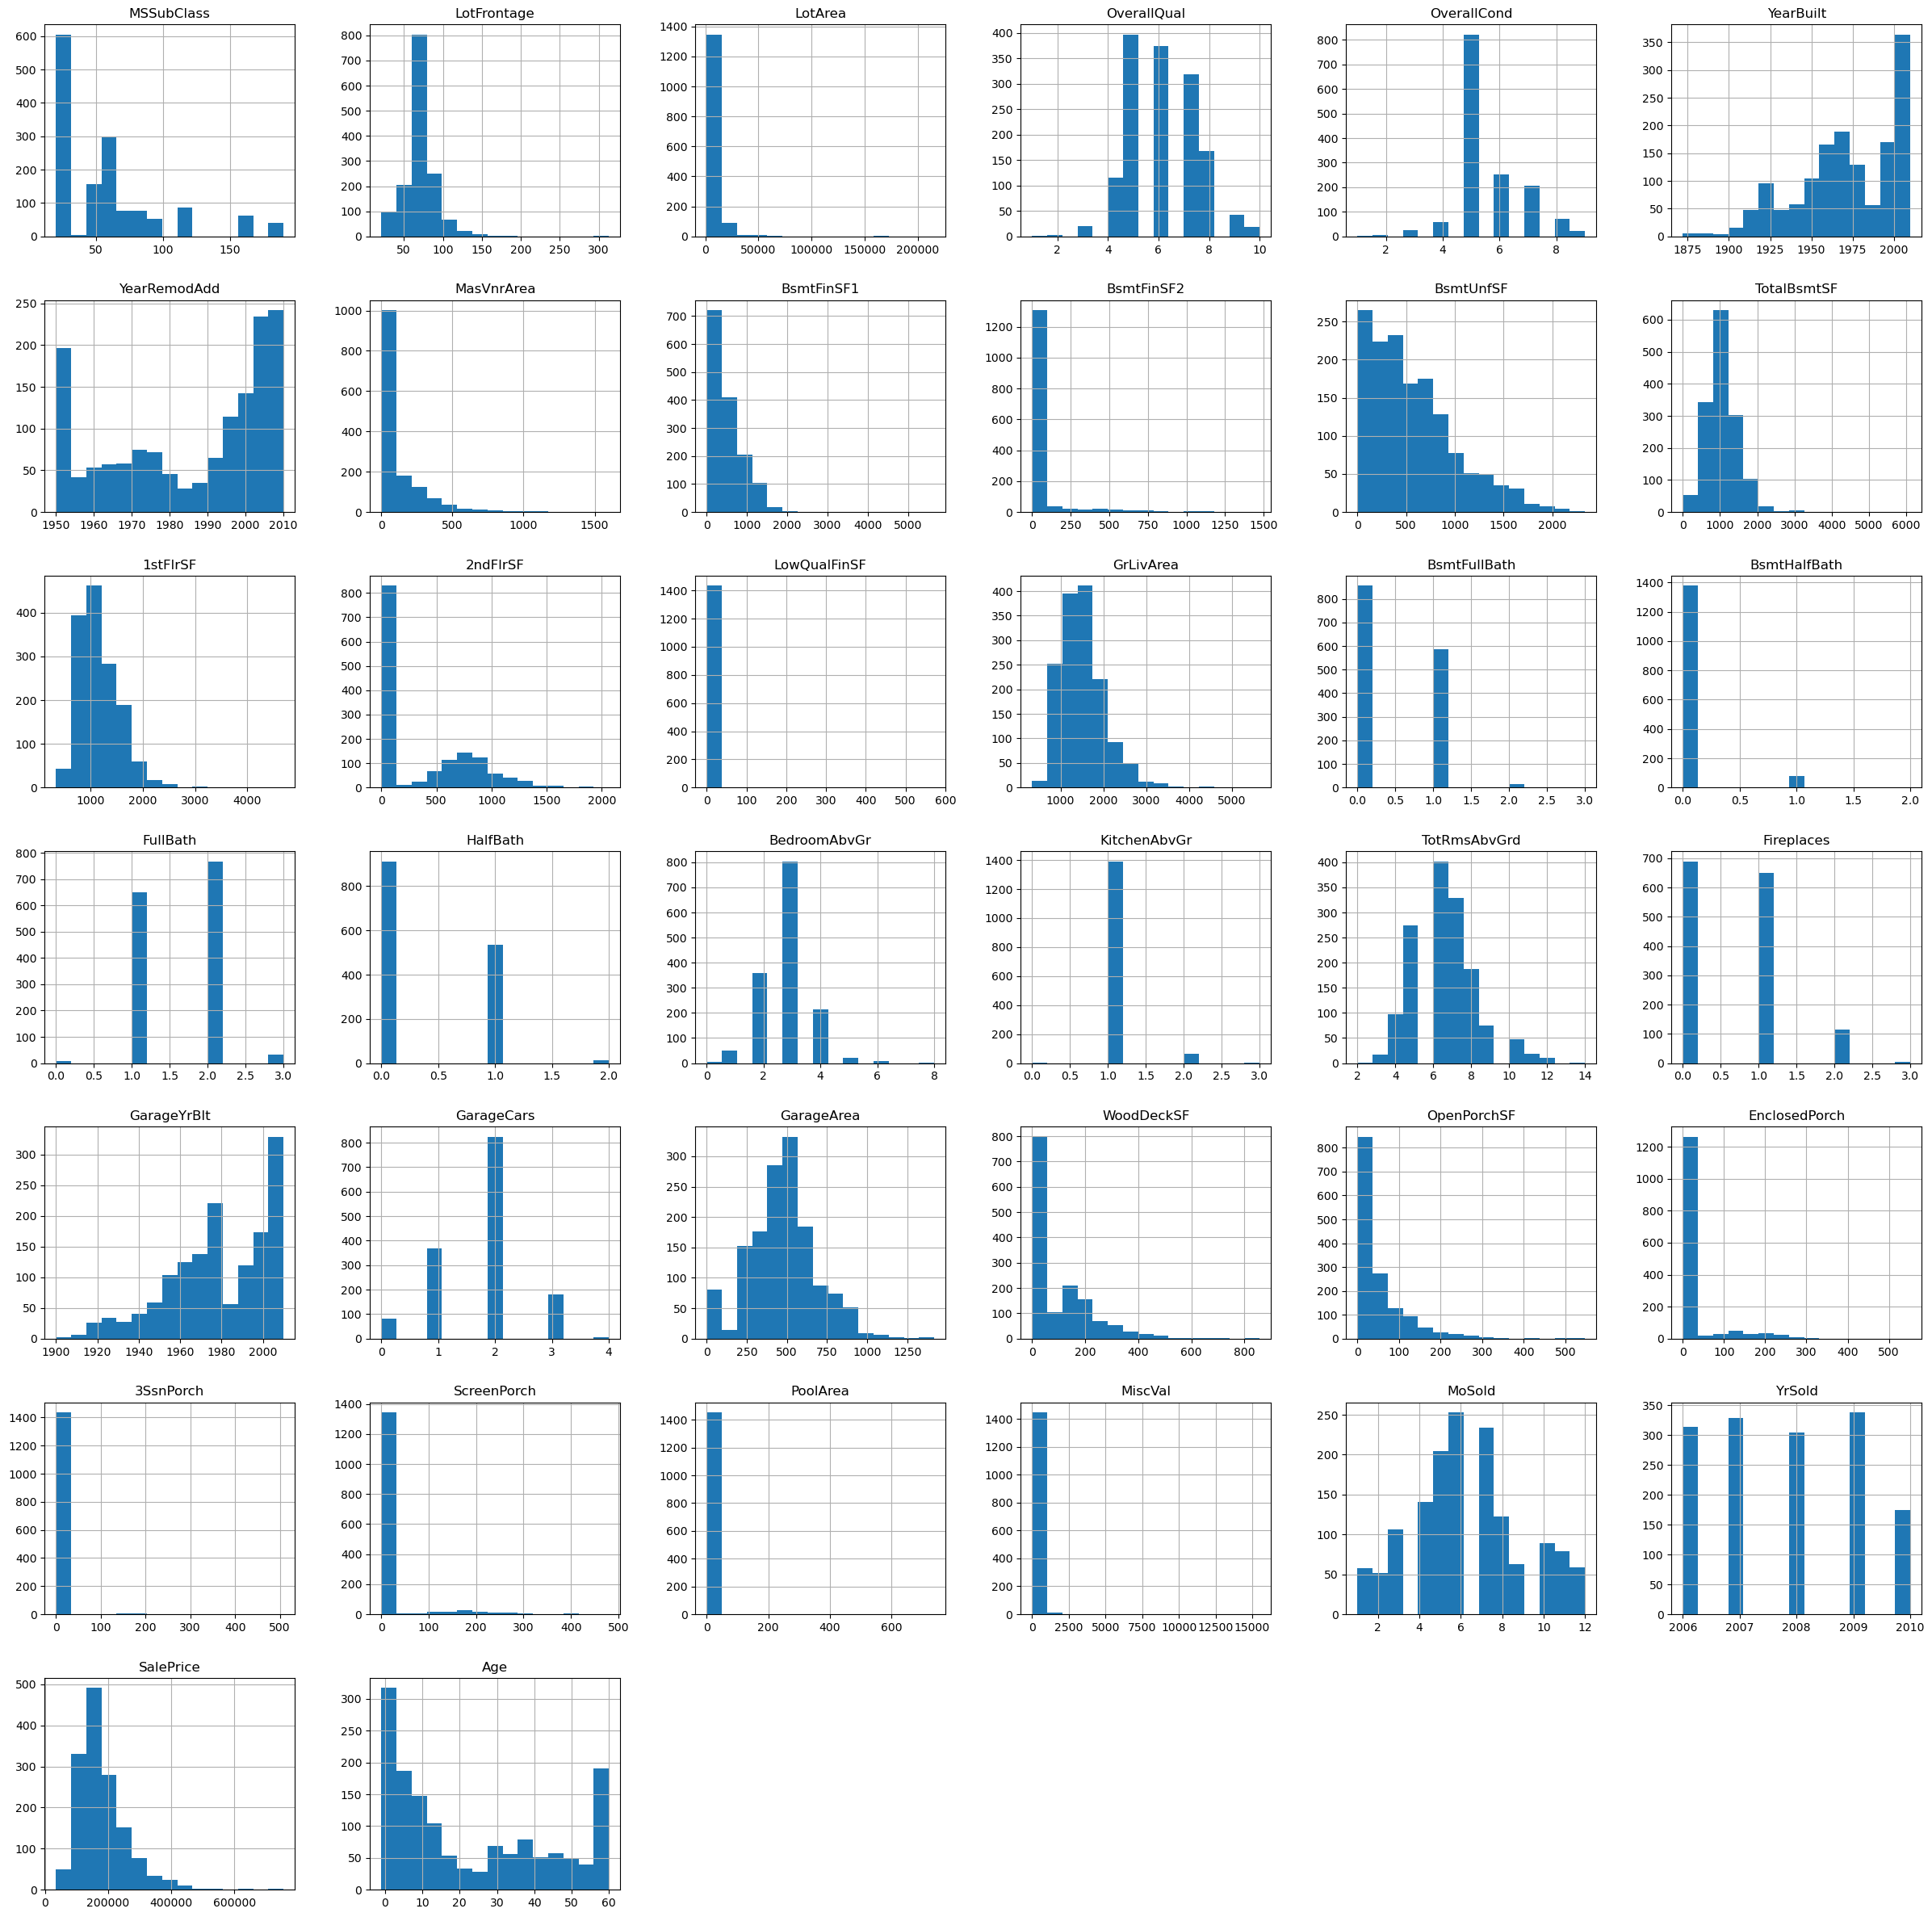

In [24]:
Numeric_columns = housing.dtypes[housing.dtypes != "object"].index
housing[Numeric_columns].hist(bins=15, figsize=(30, 30))
plt.show()

#### GarageArea, MoSold, TotRmsAbvGrd, overallCond shows good distribution. where maximum data shows skewness so not able to interpret much

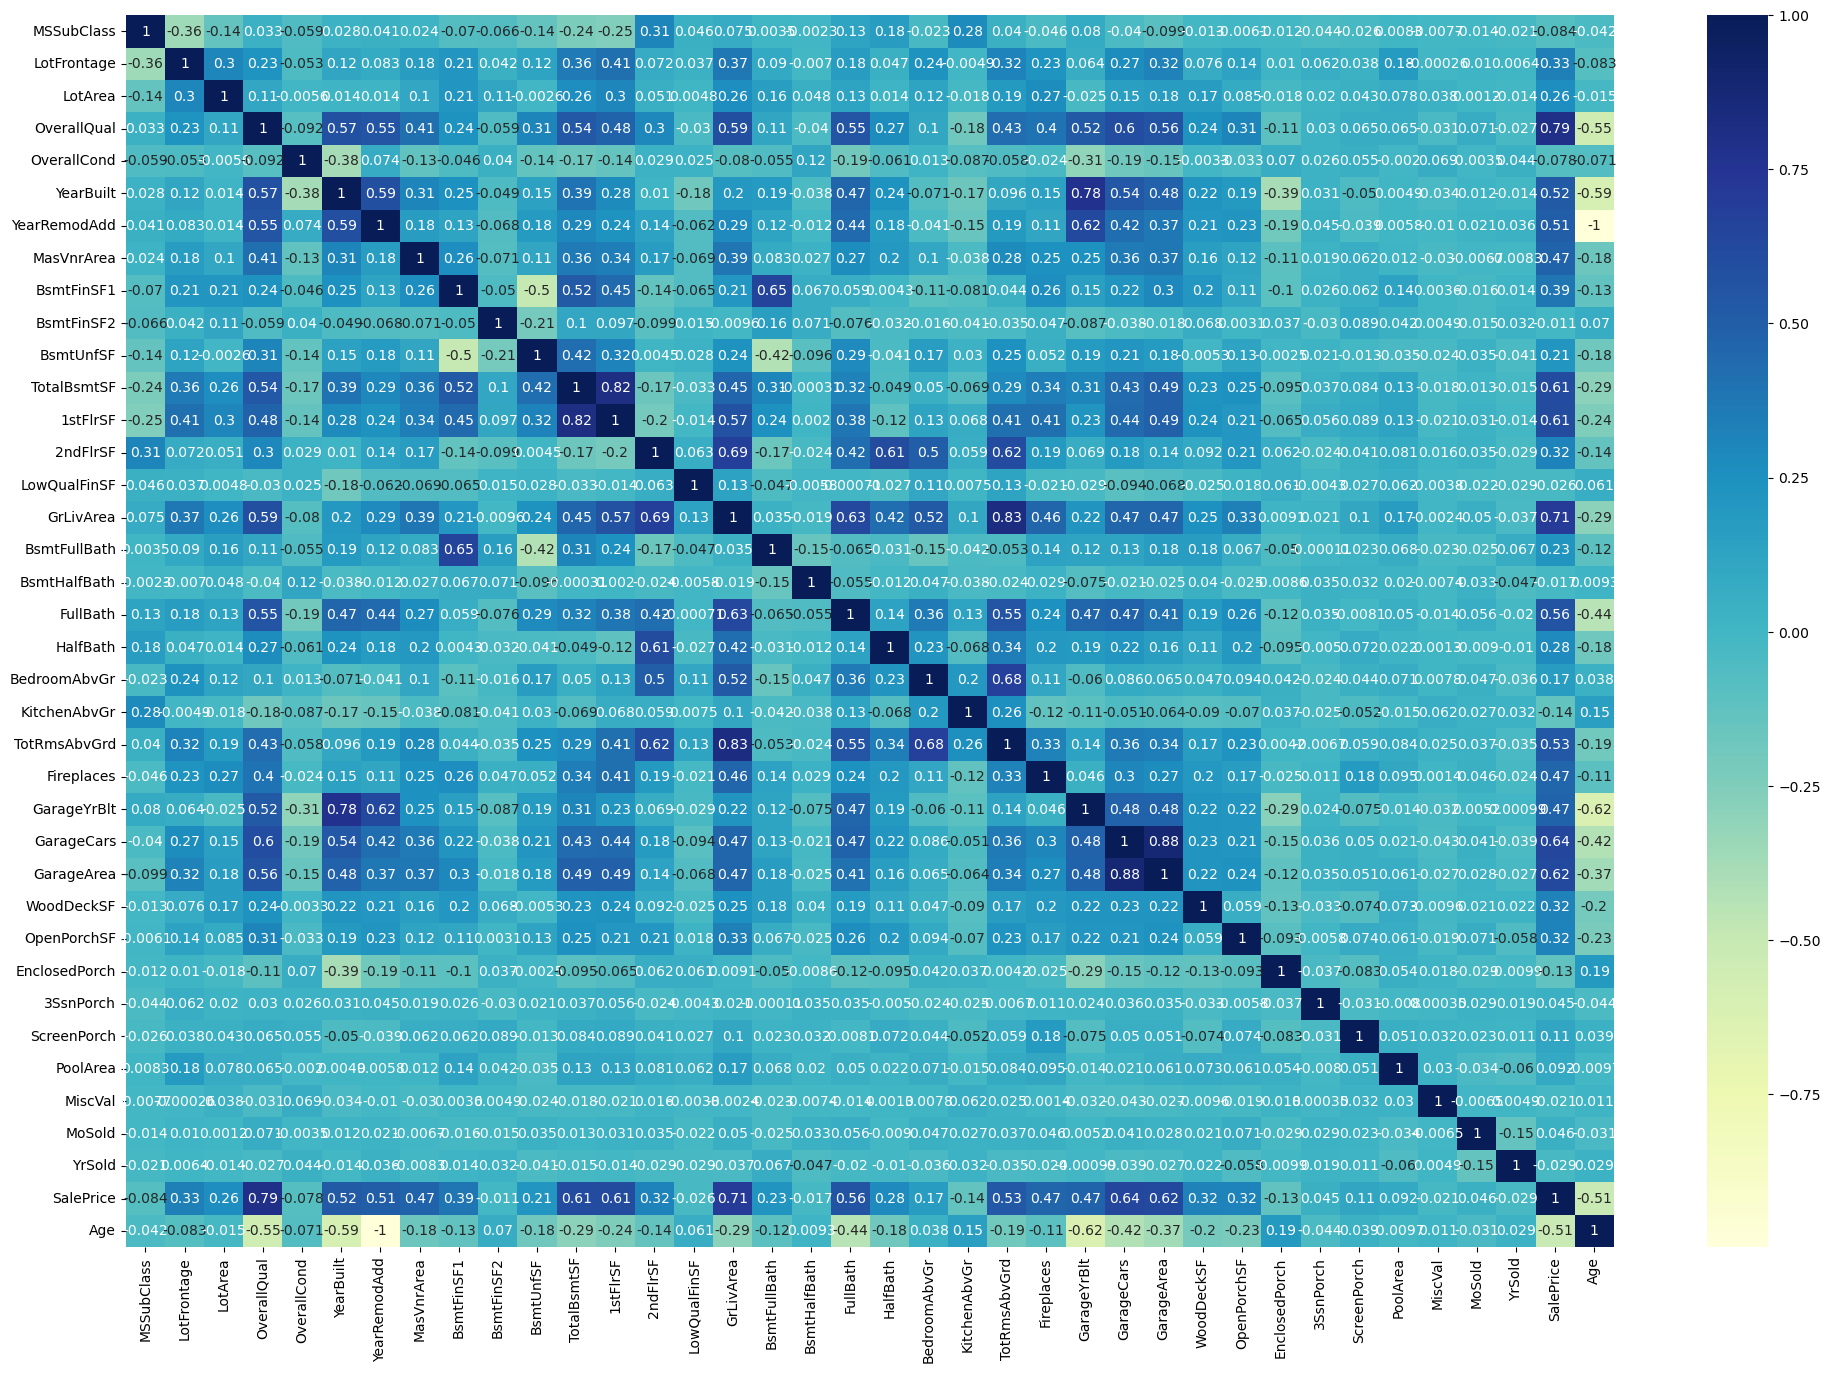

In [25]:
# Generate Correlation matirx for multi-linear and multi-colinearity 
correlation = housing.corr()

plt.figure(figsize=(24,16))

# heatmap Generation for quick analysis
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

#### Inference based on heat map
* SalePrice is very high positively correlated to the Overall Quality
* SalePrice is very high positively correlated to the 1stFlrSF 
* SalePrice is very high positively correlated to the TotalBsmtSF
* SalePrice is very high positively correlated to the GrLivArea
* SalePrice is very high positively correlated to the FullBath
* SalePrice is very high positively correlated to the TotRmsAbvGrd
* SalePrice is very high positively correlated to the GarageCars
* SalePrice is very high positively correlated to the GarageAre
* SalePrice is very high negatively correlated to the Age

## Bi-variate Analysis

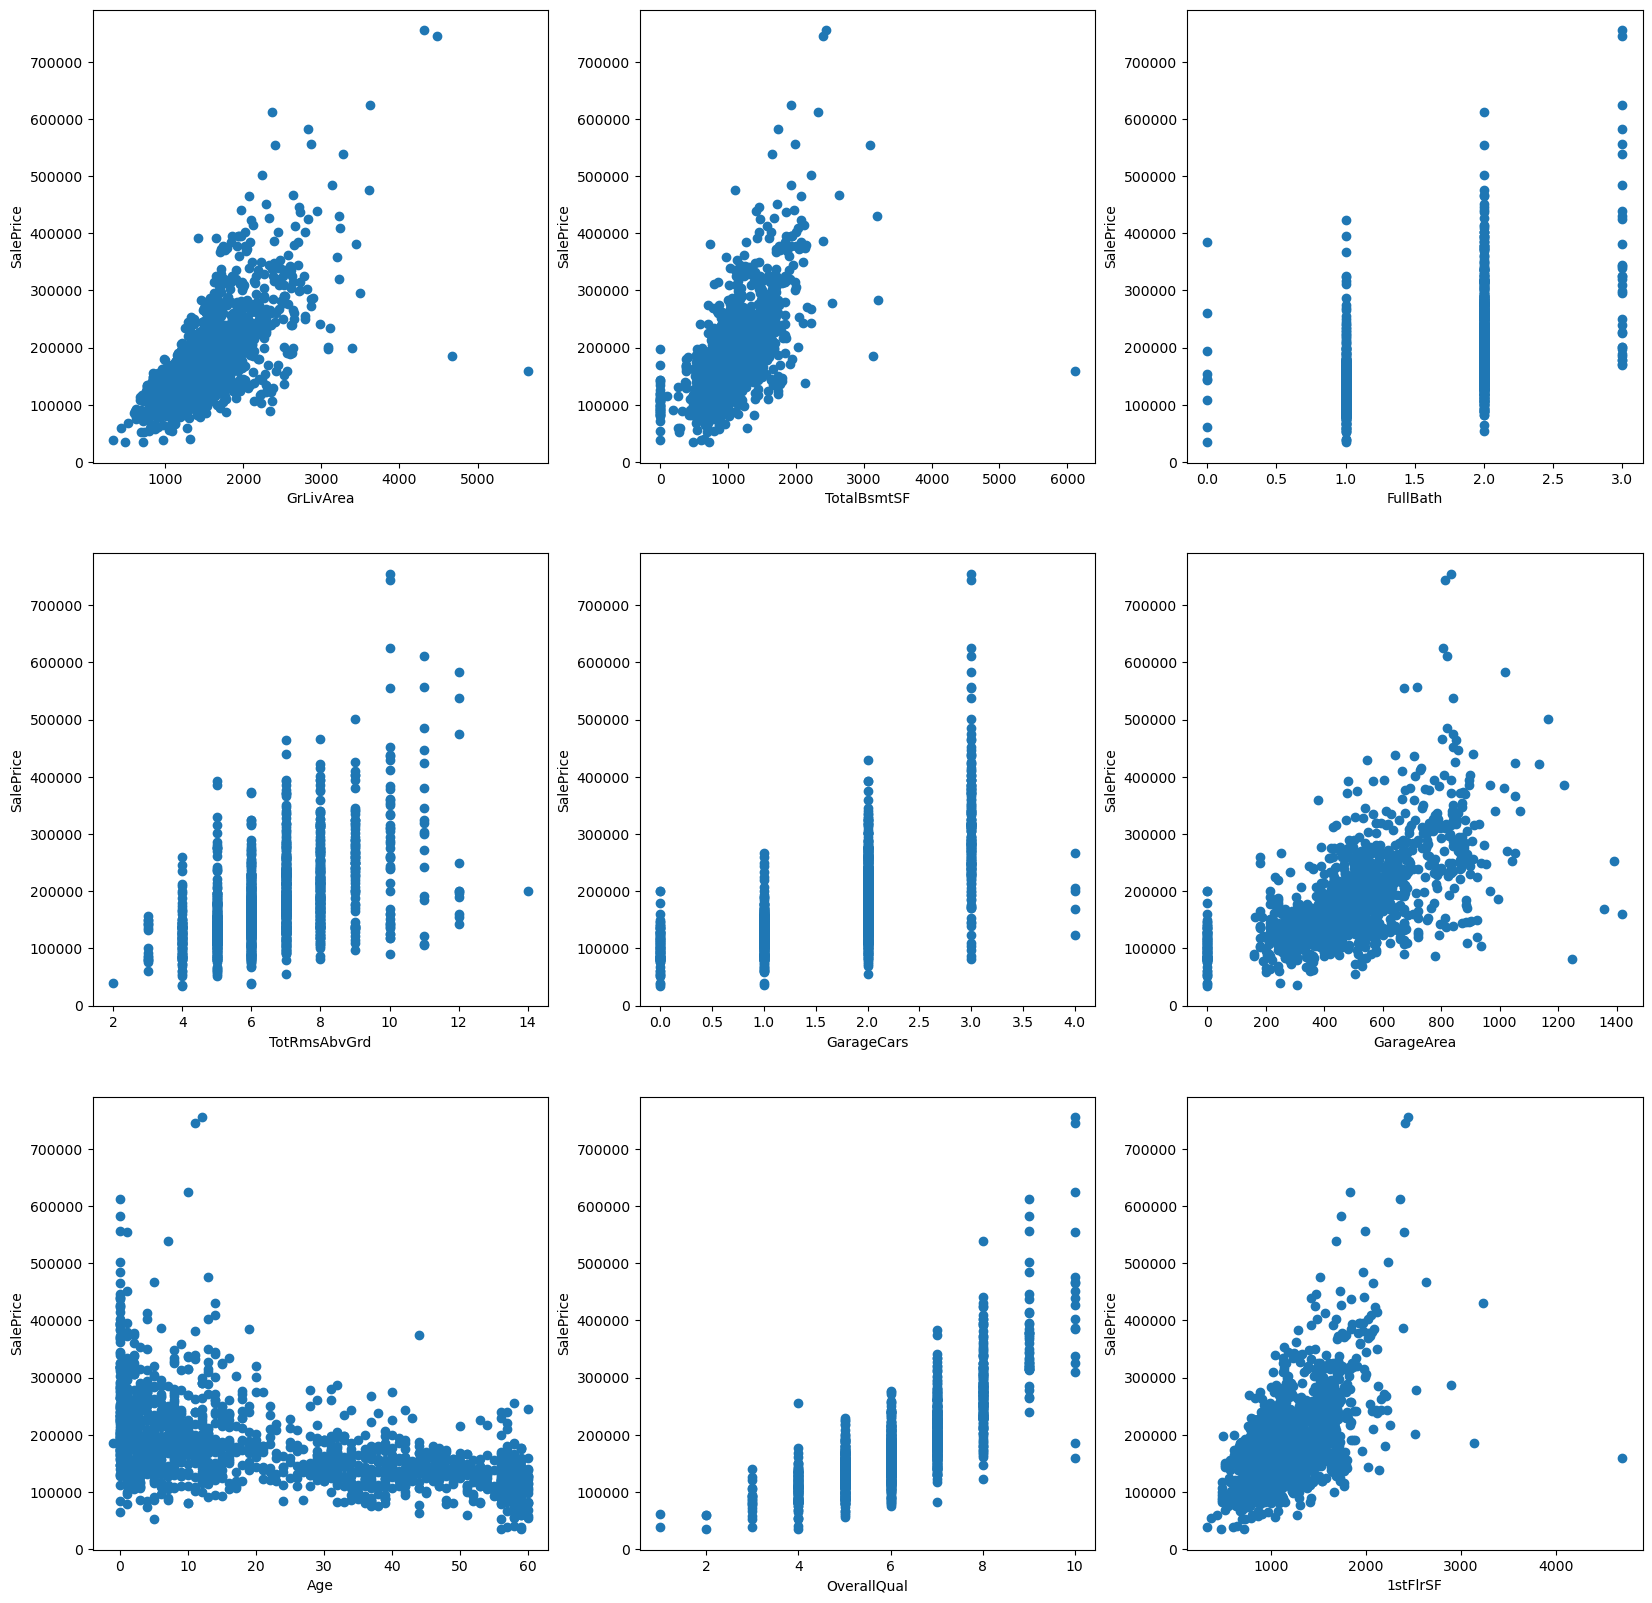

In [26]:
Bivar_Col = ['GrLivArea','TotalBsmtSF','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','Age','OverallQual','1stFlrSF']

plt.figure(figsize = (20,20)) 
index = 0
for column in Bivar_Col:
    index = index + 1
    plt.subplot(3,3,index)
    plt.scatter(housing[column], housing['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('SalePrice')


### Inferences :

We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regresssion model.

### Bi-variate analysis of Categorical data

In [27]:
Categorical_columns  = housing.dtypes[housing.dtypes == "object"].index
Categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

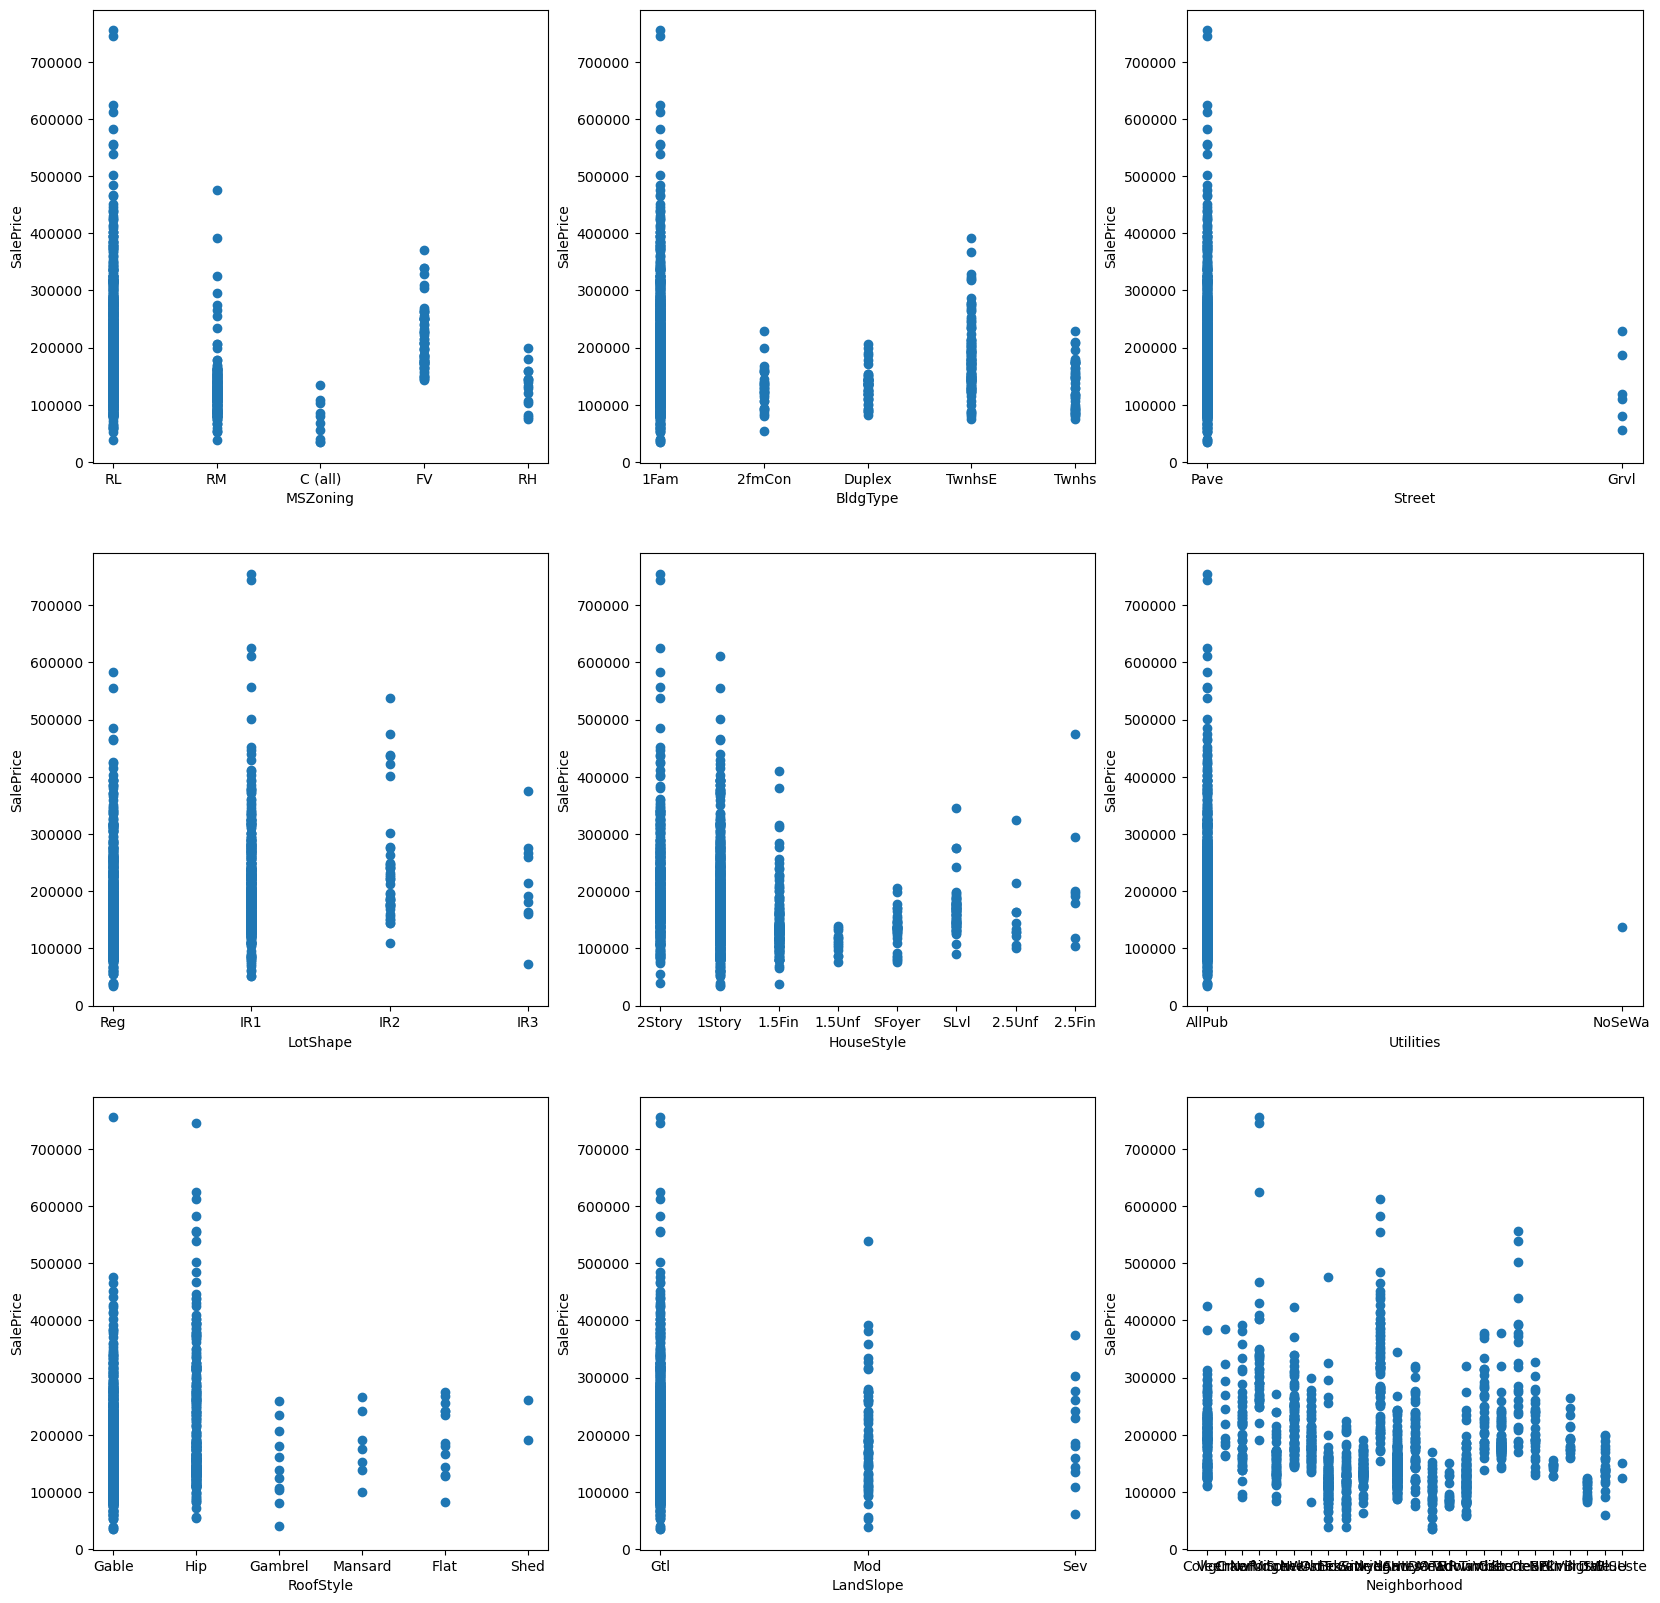

In [28]:
Bivar_Col = ['MSZoning','BldgType','Street','LotShape','HouseStyle','Utilities','RoofStyle','LandSlope','Neighborhood']

plt.figure(figsize = (20,20)) 
index = 0
for column in Bivar_Col:
    index = index + 1
    plt.subplot(3,3,index)
    plt.scatter(housing[column], housing['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('SalePrice')

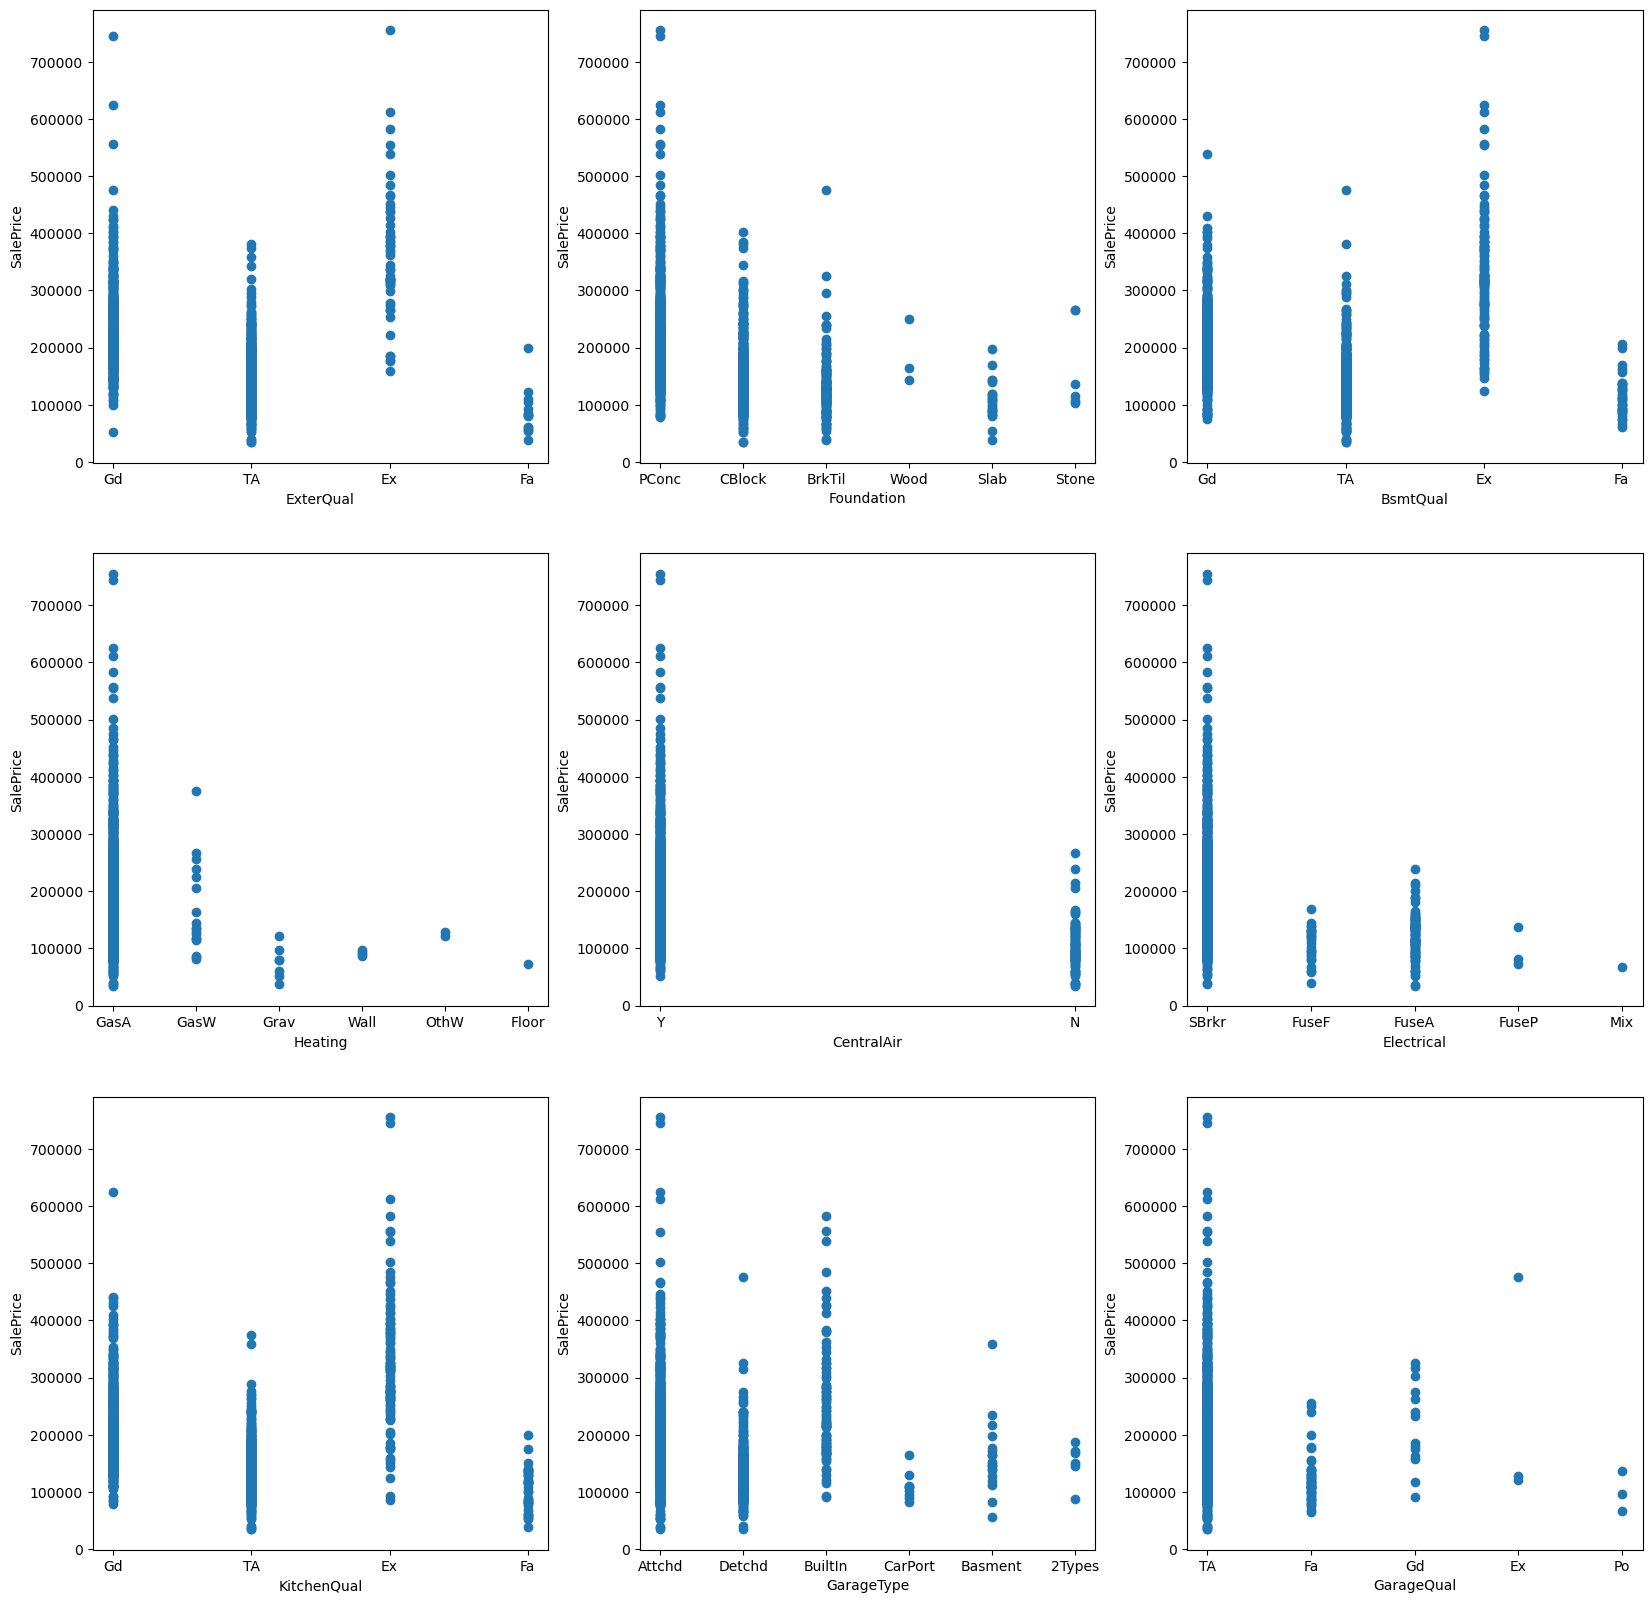

In [29]:
Bivar_Col = ['ExterQual','Foundation','BsmtQual','Heating','CentralAir','Electrical','KitchenQual','GarageType','GarageQual']

plt.figure(figsize = (20,20)) 
index = 0
for column in Bivar_Col:
    index = index + 1
    plt.subplot(3,3,index)
    plt.scatter(housing[column], housing['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('SalePrice')

Inferences  drawn - 
- MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
- The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
- the utlities coulms have most of its values as 'AllPub' So we this column have give much of an informration. - ITs not an important feature.
- The house with Exterior Quality of type Execellent has the highest SalePrice.
- The house with Basement Quality of type Execellent has the highest SalePrice.
- The house with Kitchen Quality of type Execellent has the highest SalePrice.
- The house with Garage Quality of type Execellent has the highest SalePrice.
- The house with Garage Type of type BuiltIn has the highest SalePrice.
- The house with Sale Type of type New has the highest SalePrice.
- The Central air of type 'Yes' has more Sale Price when compared to 'No'


#  Data pre-processing

In [30]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

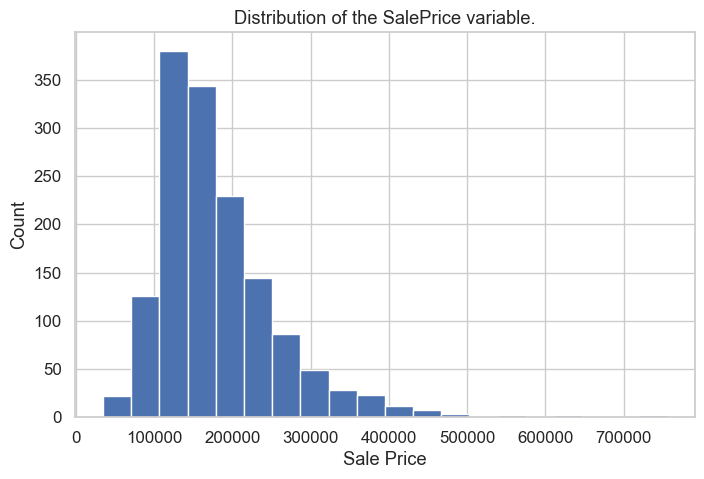

In [31]:
#Check the distribution the SalePrice
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(housing['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()

### The distribution of saleprice is right skewed, we need to transform and make it normally distributed using log

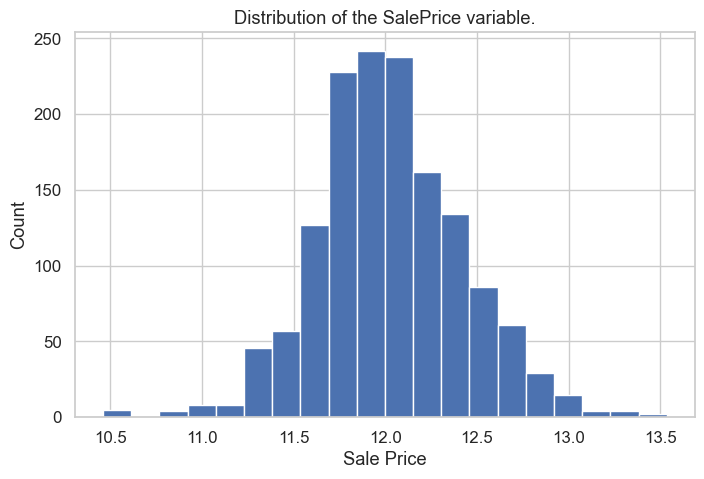

In [32]:
housing["SalePrice"] = np.log(housing["SalePrice"])
#Check the distribution the SalePrice
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(housing['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()

### we successfully transformed distribution to Normal

In [33]:
## Encoding of Categorical data
# convert MSSubClass into categorical
Categorical_columns = ['MSZoning',    
'Street',       
'LotShape',     
'LandContour',  
'Utilities',    
'LotConfig',    
'LandSlope',    
'Neighborhood', 
'Condition1',   
'Condition2',   
'BldgType',     
'HouseStyle',   
'RoofStyle',    
'RoofMatl',     
'Exterior1st',  
'Exterior2nd',  
'MasVnrType',   
'ExterQual',    
'ExterCond',    
'Foundation',   
'BsmtQual',     
'BsmtCond',     
'BsmtExposure', 
'BsmtFinType1', 
'BsmtFinType2', 
'Heating',      
'HeatingQC',    
'CentralAir',   
'Electrical',   
'KitchenQual',  
'Functional',   
'GarageType',   
'GarageFinish', 
'GarageQual',   
'GarageCond',   
'PavedDrive',   
'SaleType',     
'SaleCondition']

housing['MSSubClass'] = housing['MSSubClass'].astype('object')
Categorical_columns.insert(0, 'MSSubClass')

print(Categorical_columns)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [34]:
def map_rating(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})	
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})
def map_function7(x):
    return x.map({'BrkCmn':4,'BrkFace':3,'CBlock':2,'None':0,'Stone':1})
def map_function8(x):
    return x.map({'SBrkr':4,'FuseA':3,'FuseF':2,'FuseP':5,'Mix':1})
def map_function9(x):
    return x.map({'2Types':6,'Attchd':5,'Basment':4,'BuiltIn':3,'CarPort':2,'Detchd':1,'None':0})

housing['ExterQual'] 		= housing[['ExterQual']].apply(map_rating)
housing['ExterCond'] 		= housing[['ExterCond']].apply(map_rating)
housing['BsmtQual'] 		= housing[['BsmtQual']].apply(map_rating)
housing['BsmtCond'] 		= housing[['BsmtCond']].apply(map_rating)
housing['HeatingQC'] 		= housing[['HeatingQC']].apply(map_rating)
housing['KitchenQual'] 		= housing[['KitchenQual']].apply(map_rating)
housing['GarageQual'] 		= housing[['GarageQual']].apply(map_rating)
housing['GarageCond'] 		= housing[['GarageCond']].apply(map_rating)

housing['BsmtExposure'] 	= housing[['BsmtExposure']].apply(map_function1)
housing['BsmtFinType1'] 	= housing[['BsmtFinType1']].apply(map_function2)
housing['BsmtFinType2'] 	= housing[['BsmtFinType2']].apply(map_function2)
housing['CentralAir'] 		= housing[['CentralAir']].apply(map_function3)
housing['Functional'] 		= housing[['Functional']].apply(map_function4)
housing['GarageFinish'] 	= housing[['GarageFinish']].apply(map_function5)
housing['PavedDrive'] 		= housing[['PavedDrive']].apply(map_function6)

housing['MasVnrType'] 		= housing[['MasVnrType']].apply(map_function7)
housing['Electrical'] 		= housing[['Electrical']].apply(map_function8)
housing['GarageType'] 		= housing[['GarageType']].apply(map_function9)

### Dummy creation for categorical variable

In [35]:
dummy = pd.get_dummies(housing[Categorical_columns], drop_first=True)
print(dummy.head())

   ExterQual  ExterCond  HeatingQC  CentralAir  KitchenQual  Functional  \
0          4          3          5           1            4           8   
1          3          3          5           1            3           8   
2          4          3          5           1            4           8   
3          3          3          4           1            4           8   
4          4          3          5           1            4           8   

   PavedDrive  MSSubClass_30  MSSubClass_40  MSSubClass_45  ...  \
0           2              0              0              0  ...   
1           2              0              0              0  ...   
2           2              0              0              0  ...   
3           2              0              0              0  ...   
4           2              0              0              0  ...   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0       

In [36]:
housing = pd.concat([housing, dummy], axis = 1)

In [37]:
housing = housing.drop(Categorical_columns, axis = 1)

In [38]:
total_Missing_Values = housing.isnull().sum().sort_values(ascending = False)
total_values = housing.shape[0]
total_Missing_Percentage = ((housing.isnull().sum()/total_values)*100).sort_values(ascending = False)
Missing_table = pd.concat([total_Missing_Values,total_Missing_Percentage], axis=1, keys= ['Total Missing values','Percentage Missing values'])
print(Missing_table)

                       Total Missing values  Percentage Missing values
LotFrontage                               0                        0.0
LotArea                                   0                        0.0
Exterior1st_VinylSd                       0                        0.0
Exterior1st_Wd Sdng                       0                        0.0
Exterior1st_WdShing                       0                        0.0
Exterior2nd_AsphShn                       0                        0.0
Exterior2nd_Brk Cmn                       0                        0.0
Exterior2nd_BrkFace                       0                        0.0
Exterior2nd_CBlock                        0                        0.0
Exterior2nd_CmentBd                       0                        0.0
Exterior2nd_HdBoard                       0                        0.0
Exterior2nd_ImStucc                       0                        0.0
Exterior2nd_MetalSd                       0                        0.0
Exteri

# Step5 - Data Modeling

In [39]:
## Split test and train dataset
np.random.seed(0)
house_train,house_test = train_test_split(housing, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(1021, 224)
(439, 224)


In [40]:
## Remove target variable from both test and train sets
y_train=house_train.pop('SalePrice')
X_train=house_train

y_test=house_test.pop('SalePrice')
X_test=house_test

In [41]:
## Scaling the features - transform only numerical variables
scaler=MinMaxScaler()
Numeric_columns = X_train.dtypes[X_train.dtypes != "category"].index
#print(housing[Numeric_columns].head)
X_train[Numeric_columns]=scaler.fit_transform(X_train[Numeric_columns])
X_test[Numeric_columns]=scaler.transform(X_test[Numeric_columns])

In [42]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(housing.head(3))
#print(X_train.GarageType.nunique())

   LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0   

## RFE Techinque to select features
As it contains more number of features, RFE technique can be used to select features automatically

In [43]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
#Model parameters - Coefficients , intercepts
print(lm.coef_)
print(lm.intercept_)

[ 1.14374268e-01  6.41278539e-01  3.52866135e-01  3.13421933e-01
  2.80678677e-01  1.49514021e+12  3.34356297e-02 -3.99130786e+11
 -1.04237913e+11 -1.65196583e+11  4.32085242e+11 -5.24052056e+10
 -2.50501735e+10 -6.24737984e+09  6.31288634e+10  7.56225586e-02
  4.50325012e-03  4.05120850e-02  3.02429199e-02 -2.01988220e-03
 -1.75277710e-01  2.41260529e-02  7.04183578e-02  3.40270996e-03
  9.63973999e-02  1.39385223e-01  7.06329346e-02  3.32412720e-02
  6.74819946e-02  9.40628052e-02  6.97059631e-02  1.06811523e-01
 -3.33852768e-02 -3.31115723e-03 -9.96760142e+10  1.52005922e+12
 -1.00112915e-01 -7.93151855e-02 -2.54920959e-01 -1.70249939e-02
 -3.93981934e-02  9.51766968e-03 -1.74484253e-01 -4.47540283e-02
  5.68389893e-03 -3.32902465e+10 -4.55322266e-02 -1.62780762e-01
 -8.56628418e-02  2.52031889e+10  4.81132507e-01  4.57273245e-01
  4.61578369e-01  3.93524170e-01  1.01816177e-01  1.18827820e-02
  2.62451172e-03  1.20239258e-02  5.47027588e-03 -1.47094727e-02
  1.30519867e-02 -1.25182

In [1]:
lm = LinearRegression()   
rfe = RFE(lm, n_features_to_select = 80)
rfe.fit(X_train, y_train)  


NameError: name 'LinearRegression' is not defined

In [46]:
# Features eliminated from RFE to build model 
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF',
       'OpenPorchSF',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=143)

In [47]:
# Train1 - train model with after eliminating features
rfe_col = X_train.columns[rfe.support_]
X_train_rfe1 = X_train[rfe_col]

In [48]:
# Using stats model to get detailed statistics from the linear regression model
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant

In [49]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()

In [50]:
print (lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     210.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:22:44   Log-Likelihood:                 919.75
No. Observations:                1021   AIC:                            -1700.
Df Residuals:                     951   BIC:                            -1355.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.85

In [51]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,const,0.00
1,LotFrontage,1.88
2,LotArea,2.31
3,OverallQual,3.72
4,OverallCond,1.79
5,YearBuilt,4.84
6,YearRemodAdd,inf
7,BsmtFinSF1,inf
8,BsmtFinSF2,inf
9,BsmtUnfSF,inf


## Inference from Linear Regression Model
The R-squred value of inear regression model built from 80 feature is 93.6%,
which looks like model performance is good with 
training data. The VIF value of many feature is infinity which shows Multicollinearity. 
one of the possible approach to this is to use Regularization

## Ridge Regression Model

In [52]:
X_train = X_train[rfe_col]
X_test = X_test[rfe_col]

In [53]:
ridge = Ridge(alpha=0.001) #start with small alpha 0.001 With a small alpha, Ridge regression will only minimally shrink the coefficients towards zero.
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.9385093992536082


In [54]:
# Verifying model with different alpha values
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
# Verifying the reults
ridge_results = pd.DataFrame(model_cv.cv_results_)

ridge_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006252,0.007657,0.000000,0.000000,0.001,{'alpha': 0.001},-0.080629,-0.091763,-0.093725,-0.091877,-0.075104,-0.086620,0.007390,2,-0.069413,-0.071282,-0.069460,-0.071048,-0.070215,-0.070283,0.000777
1,0.003127,0.006254,0.000000,0.000000,0.01,{'alpha': 0.01},-0.081096,-0.091679,-0.093603,-0.090503,-0.074777,-0.086332,0.007208,1,-0.069990,-0.071325,-0.069996,-0.071412,-0.070899,-0.070724,0.000622
2,0.000427,0.000854,0.001600,0.003200,0.5,{'alpha': 0.5},-0.091523,-0.089873,-0.099617,-0.087904,-0.085056,-0.090795,0.004909,3,-0.082920,-0.073565,-0.082128,-0.083694,-0.084941,-0.081449,0.004050
3,0.003233,0.003960,0.001119,0.001374,1.0,{'alpha': 1.0},-0.092968,-0.091144,-0.101019,-0.089828,-0.087159,-0.092424,0.004696,4,-0.085910,-0.075926,-0.084288,-0.086803,-0.088104,-0.084206,0.004322
4,0.002049,0.002511,0.003944,0.004968,10.0,{'alpha': 10.0},-0.102511,-0.111448,-0.116066,-0.109439,-0.107302,-0.109353,0.004483,5,-0.106737,-0.099870,-0.101886,-0.105879,-0.108139,-0.104502,0.003112
5,0.004730,0.006278,0.000000,0.000000,50,{'alpha': 50},-0.138481,-0.150826,-0.148910,-0.147474,-0.154700,-0.148078,0.005377,6,-0.146600,-0.143411,-0.143205,-0.144617,-0.146546,-0.144876,0.001467
6,0.001249,0.002499,0.006973,0.006179,100,{'alpha': 100},-0.163241,-0.173352,-0.169566,-0.169653,-0.180941,-0.171351,0.005794,7,-0.170172,-0.167889,-0.168337,-0.168011,-0.169665,-0.168815,0.000927


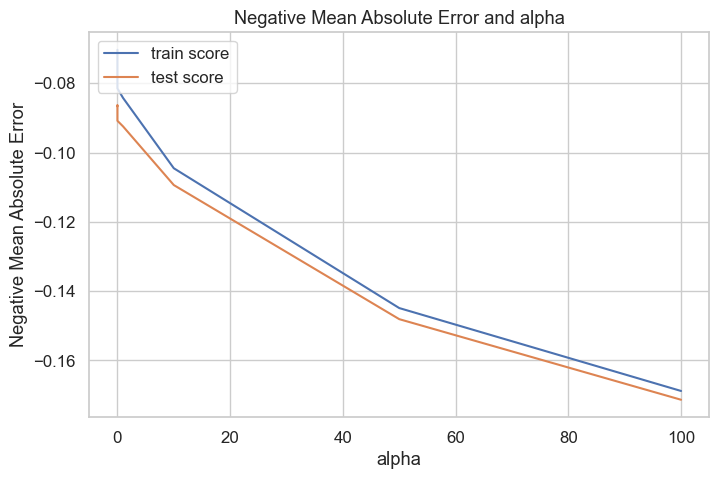

In [56]:
# plotting mean test and train scoes with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [57]:
#observed alpha between 0-10
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
# Verifying the reults
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003419,0.003570,0.000797,0.001595,0.001,{'alpha': 0.001},-0.080629,-0.091763,-0.093725,-0.091877,-0.075104,-0.086620,0.007390,2,-0.069413,-0.071282,-0.069460,-0.071048,-0.070215,-0.070283,0.000777
1,0.001627,0.003254,0.000000,0.000000,0.01,{'alpha': 0.01},-0.081096,-0.091679,-0.093603,-0.090503,-0.074777,-0.086332,0.007208,1,-0.069990,-0.071325,-0.069996,-0.071412,-0.070899,-0.070724,0.000622
2,0.004671,0.006241,0.003127,0.006253,1.0,{'alpha': 1.0},-0.092968,-0.091144,-0.101019,-0.089828,-0.087159,-0.092424,0.004696,3,-0.085910,-0.075926,-0.084288,-0.086803,-0.088104,-0.084206,0.004322
3,0.000000,0.000000,0.006340,0.005873,2.0,{'alpha': 2.0},-0.094114,-0.093720,-0.103283,-0.092648,-0.090036,-0.094760,0.004492,4,-0.089514,-0.080010,-0.086975,-0.090299,-0.091906,-0.087741,0.004181
4,0.004629,0.005132,0.003622,0.003675,3.0,{'alpha': 3.0},-0.095032,-0.096051,-0.105206,-0.095196,-0.092445,-0.096786,0.004379,5,-0.092377,-0.083321,-0.089298,-0.092794,-0.094616,-0.090481,0.003968
5,0.001612,0.003224,0.004728,0.006273,4.0,{'alpha': 4.0},-0.096000,-0.098631,-0.106965,-0.097319,-0.094653,-0.098714,0.004333,6,-0.094885,-0.086233,-0.091360,-0.095032,-0.096971,-0.092896,0.003792
6,0.000000,0.000000,0.000000,0.000000,5.0,{'alpha': 5.0},-0.096836,-0.101049,-0.108727,-0.099451,-0.096951,-0.100603,0.004360,7,-0.097198,-0.088856,-0.093313,-0.097154,-0.099127,-0.095130,0.003661
7,0.000000,0.000000,0.003125,0.006250,6.0,{'alpha': 6.0},-0.097698,-0.103318,-0.110422,-0.101582,-0.099098,-0.102424,0.004447,8,-0.099298,-0.091324,-0.095186,-0.099116,-0.101100,-0.097205,0.003518
8,0.005701,0.006142,0.000072,0.000144,7.0,{'alpha': 7.0},-0.098802,-0.105497,-0.111932,-0.103697,-0.101189,-0.104223,0.004470,9,-0.101241,-0.093617,-0.096933,-0.100904,-0.102970,-0.099133,0.003393
9,0.001739,0.003478,0.000602,0.001204,8.0,{'alpha': 8.0},-0.100041,-0.107610,-0.113399,-0.105746,-0.103250,-0.106009,0.004483,10,-0.103147,-0.095801,-0.098589,-0.102601,-0.104742,-0.100976,0.003287


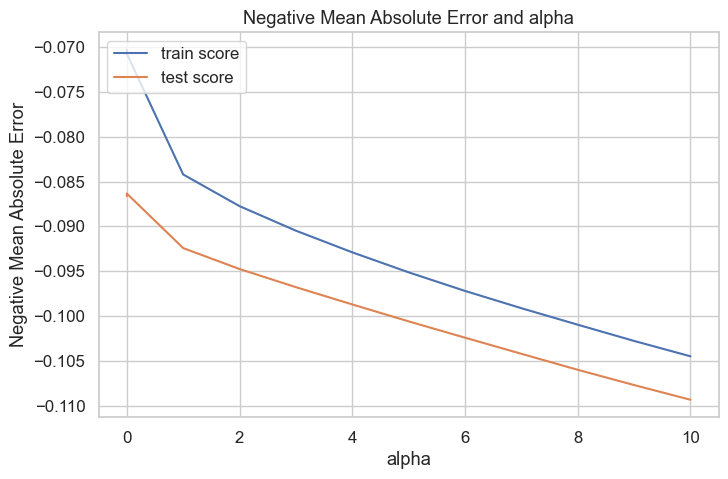

In [59]:
# plotting mean test and train scoes with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [60]:
# Model with optimal alpha
ridge = Ridge(alpha = 1.0)#Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [61]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [62]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.034233,10.034233
40,MSSubClass_60,-0.693683,0.693683
3,OverallCond,0.606049,0.606049
14,GrLivArea,0.563806,0.563806
11,1stFlrSF,0.534027,0.534027
53,MSZoning_RM,0.396782,0.396782
5,YearRemodAdd,0.317615,0.317615
17,FullBath,0.316699,0.316699
4,YearBuilt,0.301407,0.301407
12,2ndFlrSF,0.299828,0.299828


In [63]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.901
Ridge regression test r2:  0.8714


# Lasso Regression Model

In [64]:
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100]}
lasso = Lasso()
folds = 10
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005851,0.004249,0.000695,0.001120,0.001,{'alpha': 0.001},-0.094668,-0.091081,-0.091000,-0.107460,-0.102233,-0.114176,-0.101795,-0.086353,-0.099602,-0.090650,-0.097902,0.008268,1,-0.094519,-0.095618,-0.095764,-0.082945,-0.094645,-0.092456,-0.094595,-0.095887,-0.096506,-0.094778,-0.093771,0.003759
1,0.007767,0.007451,0.000668,0.000954,0.01,{'alpha': 0.01},-0.140657,-0.137469,-0.147742,-0.157281,-0.151931,-0.162802,-0.142265,-0.144629,-0.159641,-0.145689,-0.149011,0.008127,2,-0.148465,-0.148224,-0.148608,-0.145617,-0.147298,-0.145836,-0.146197,-0.147479,-0.149155,-0.147840,-0.147472,0.001166
2,0.003472,0.005123,0.000245,0.000496,0.5,{'alpha': 0.5},-0.325719,-0.298668,-0.316875,-0.307588,-0.309455,-0.304242,-0.310743,-0.279926,-0.331905,-0.318917,-0.310404,0.013873,3,-0.308774,-0.311443,-0.309236,-0.310237,-0.310260,-0.310775,-0.309763,-0.313453,-0.308051,-0.309282,-0.310127,0.001450
3,0.001205,0.002094,0.001710,0.004664,1.0,{'alpha': 1.0},-0.325719,-0.298668,-0.316875,-0.307588,-0.309455,-0.304242,-0.310743,-0.279926,-0.331905,-0.318917,-0.310404,0.013873,3,-0.308774,-0.311443,-0.309236,-0.310237,-0.310260,-0.310775,-0.309763,-0.313453,-0.308051,-0.309282,-0.310127,0.001450
4,0.005061,0.006853,0.000229,0.000688,10.0,{'alpha': 10.0},-0.325719,-0.298668,-0.316875,-0.307588,-0.309455,-0.304242,-0.310743,-0.279926,-0.331905,-0.318917,-0.310404,0.013873,3,-0.308774,-0.311443,-0.309236,-0.310237,-0.310260,-0.310775,-0.309763,-0.313453,-0.308051,-0.309282,-0.310127,0.001450


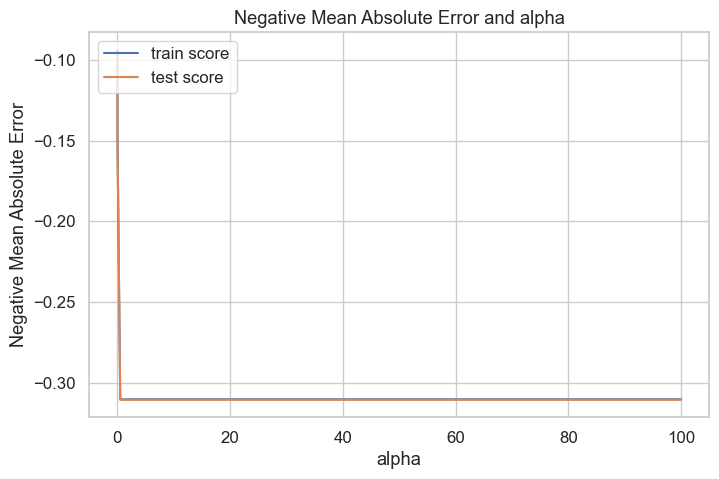

In [66]:
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [67]:
# alpha looks like lesser than 1

params = {'alpha': [0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006798,0.006167,0.001600,0.003200,0.001,{'alpha': 0.001},-0.093913,-0.095142,-0.107355,-0.094603,-0.095756,-0.097354,0.005038,1,-0.095632,-0.083158,-0.092598,-0.096237,-0.097167,-0.092958,0.005134
1,0.008950,0.003769,0.004621,0.003788,0.01,{'alpha': 0.01},-0.137754,-0.153183,-0.155782,-0.141596,-0.154709,-0.148605,0.007438,2,-0.149434,-0.146786,-0.145113,-0.146019,-0.149586,-0.147388,0.001813
2,0.003725,0.003201,0.003065,0.003091,0.05,{'alpha': 0.05},-0.276115,-0.274670,-0.261929,-0.262337,-0.288971,-0.272805,0.010036,3,-0.272566,-0.270082,-0.275139,-0.273713,-0.269908,-0.272282,0.002038
3,0.004245,0.003721,0.003657,0.003774,0.1,{'alpha': 0.1},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310608,0.009883,4,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165
4,0.002232,0.004463,0.000000,0.000000,0.2,{'alpha': 0.2},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310608,0.009883,4,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165


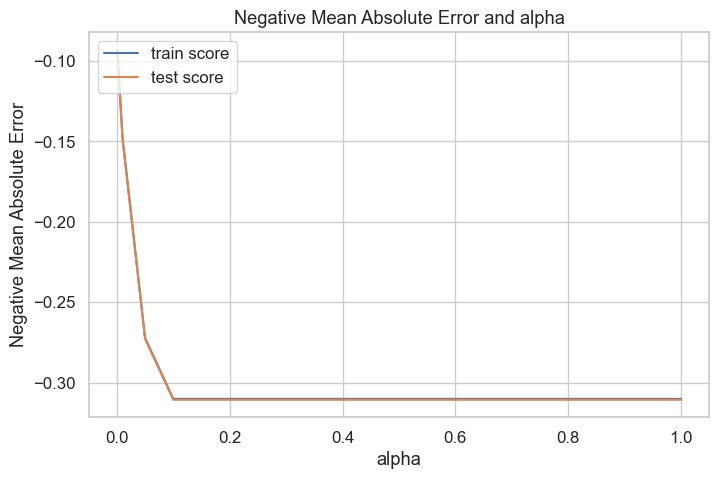

In [69]:
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [70]:
model_cv.best_params_

{'alpha': 0.001}

In [71]:
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()
folds = 10
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.028563,0.005677,0.000818,0.002196,0.00001,{'alpha': 1e-05},-0.082920,-0.076936,-0.071861,-0.109390,-0.081074,-0.109056,-0.120278,-0.064427,-0.078309,-0.070564,-0.086481,0.018248,2,-0.070161,-0.070809,-0.072048,-0.070590,-0.070620,-0.070149,-0.069631,-0.072659,-0.070557,-0.071281,-0.070850,0.000869
1,0.020701,0.003212,0.003426,0.003222,0.0001,{'alpha': 0.0001},-0.083949,-0.078831,-0.075307,-0.106627,-0.083446,-0.107191,-0.111082,-0.065850,-0.078411,-0.072132,-0.086283,0.015281,1,-0.074422,-0.074884,-0.075395,-0.071980,-0.075027,-0.073708,-0.072575,-0.076346,-0.074848,-0.075290,-0.074448,0.001266
2,0.007192,0.005145,0.001607,0.003213,0.001,{'alpha': 0.001},-0.094668,-0.091081,-0.091000,-0.107460,-0.102233,-0.114176,-0.101795,-0.086353,-0.099602,-0.090650,-0.097902,0.008268,3,-0.094519,-0.095618,-0.095764,-0.082945,-0.094645,-0.092456,-0.094595,-0.095887,-0.096506,-0.094778,-0.093771,0.003759


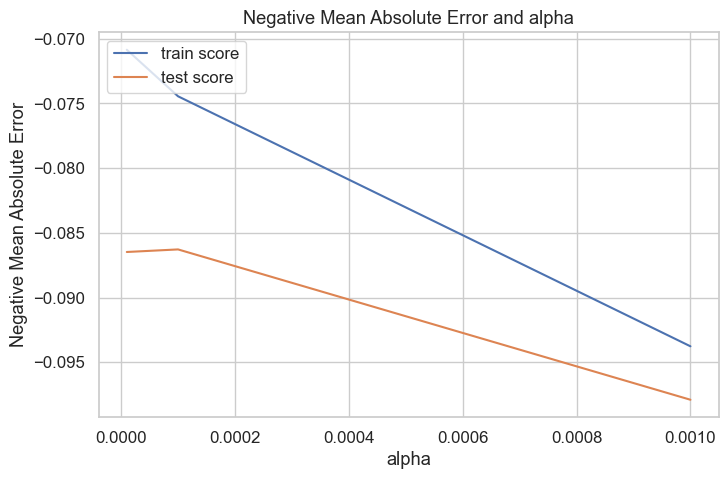

In [73]:
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [74]:
model_cv.best_params_

{'alpha': 0.0001}

In [75]:
#building model with optimal value
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9304592669537202
Lasso Regression test r2: 0.8607184539397172


In [76]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']
print(lasso_coef)

                  Feature      Coef       mod
0             LotFrontage  8.364371  8.364371
1                 LotArea  0.000000  0.000000
2             OverallQual  0.456607  0.456607
3             OverallCond  0.566473  0.566473
4               YearBuilt  0.330222  0.330222
5            YearRemodAdd  0.349249  0.349249
6              BsmtFinSF1  0.051326  0.051326
7              BsmtFinSF2  0.292596  0.292596
8               BsmtUnfSF  0.000000  0.000000
9             TotalBsmtSF -0.000000  0.000000
10               1stFlrSF  0.510532  0.510532
11               2ndFlrSF  0.000000  0.000000
12           LowQualFinSF  0.004805  0.004805
13              GrLivArea -0.062723  0.062723
14           BsmtFullBath  1.477643  1.477643
15           KitchenAbvGr  0.145437  0.145437
16             GarageCars -0.193665  0.193665
17             GarageArea  0.250154  0.250154
18                 YrSold  0.000000  0.000000
19                    Age -0.010584  0.010584
20          MSSubClass_30 -0.03380

In [77]:
lasso_coef.sort_values(by='mod',ascending=False).head(10) #top 10 features

,Feature,Coef,mod
0,LotFrontage,8.364371,8.364371
53,Exterior1st_AsphShn,1.917241,1.917241
49,RoofMatl_Roll,1.865594,1.865594
48,RoofMatl_Metal,1.863004,1.863004
51,RoofMatl_WdShake,1.828968,1.828968
47,RoofMatl_Membran,1.793255,1.793255
50,RoofMatl_Tar&Grv,1.738427,1.738427
52,RoofMatl_WdShngl,1.720640,1.720640
40,Condition2_RRAe,-1.556603,1.556603
14,BsmtFullBath,1.477643,1.477643


In [78]:
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9304592669537202
0.8607184539397172


### The accuracy of Ridge is comparitely good than of  Lasso

### Significant indicators in predicting the price of house
LotFrontage	:Linear feet of street connected to property
MSSubClass_60	:2-STORY 1946 & NEWER
OverallCond: Rates the overall condition of the house
GrLivArea: Above grade (ground) living area square feet
1stFlrSF: First Floor square feet
MSZoning_RM: Residential Medium Density
FullBath:Basement full bathrooms
YearBuilt: Original construction date
2ndFlrSF :Second floor square feet